 ## **HOMEWORK 2**

Afonso Rosa, ist1106700<br>
Leticia Vong, ist1105991

**II. Programming and critical analysis** [8v]

Consider the parkinsons.csv dataset (available at the course’s webpage), where the goal is to predict a patient’s score on the Unified Parkinson’s Disease Rating Scale based on various biomedical measurements.

To answer question 5), average the performance of the models over 10 separate runs. In each run, use a different 80-20 train-test split by setting a random_state=i, with i=1..10.

**5. [2v]** Train a Linear Regression model, an MLP Regressor with 2 hidden layers of 10 neurons each and no activation functions, and another MLP Regressor with 2 hidden layers of 10 neurons each using ReLU activation functions. (Use random_state=0 on the MLPs, regardless of the run). Plot a boxplot of the test MAE of each model.

/home/afonso215/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/afonso215/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/afonso215/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/afonso215/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/afonso215/.local/lib/python3.1

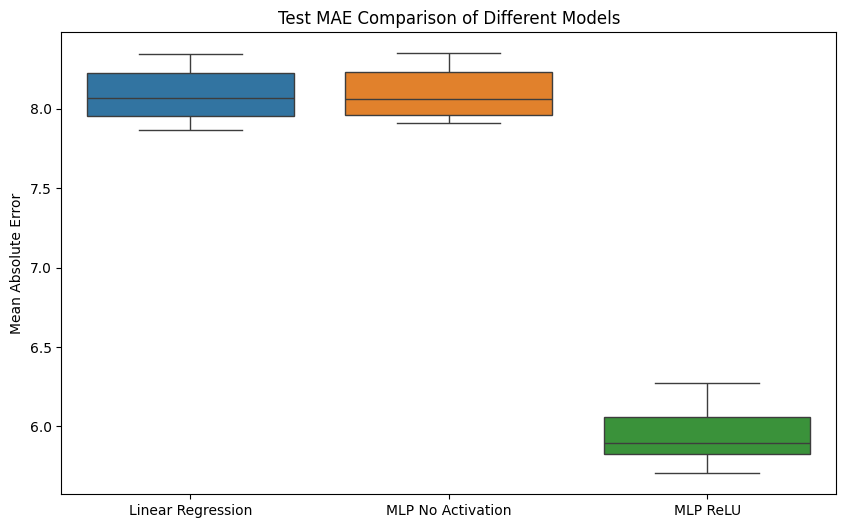

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('parkinsons.csv') 

X = data.drop(columns=['target']) 
y = data['target']

mae_linear = []
mae_mlp_no_activation = []
mae_mlp_relu = []

for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)
    mae_linear.append(mean_absolute_error(y_test, y_pred_linear))
    
    mlp_no_activation = MLPRegressor(hidden_layer_sizes=(10, 10), activation='identity', random_state=0)
    mlp_no_activation.fit(X_train, y_train)
    y_pred_no_activation = mlp_no_activation.predict(X_test)
    mae_mlp_no_activation.append(mean_absolute_error(y_test, y_pred_no_activation))
    
    mlp_relu = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0)
    mlp_relu.fit(X_train, y_train)
    y_pred_relu = mlp_relu.predict(X_test)
    mae_mlp_relu.append(mean_absolute_error(y_test, y_pred_relu))

results = pd.DataFrame({
    'Linear Regression': mae_linear,
    'MLP No Activation': mae_mlp_no_activation,
    'MLP ReLU': mae_mlp_relu
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=results)
plt.title('Test MAE Comparison of Different Models')
plt.ylabel('Mean Absolute Error')
plt.show()


**6.** [3v] Compare a Linear Regression with a MLP with no activations, and explain the impact and the importance of using activation functions in a MLP. Support your reasoning with the results from the boxplots

Uma regressão linear estabelece uma relação linear entre o input e o target, tal como o MLP sem uma função de ativação entre layers, pois usando a função identidade como ativação, cada camada no MLP calcula apenas uma combinação linear dos inputs, levando ao mesmo resultado que a regressão linear. Sem as funções de ativação, o MLP tem o mesmo poder de modelação que um modelo de regressão linear simples, tal pode ser comprovado pelos resultados dos boxplots realizados no exercício anterior, uma vez que ambos apresentam níveis semelhantes de erro médio absoluto (MAE).

As funções de ativação são então importantes para introduzir não-linearidade no modelo, possibilitando que aprenda relações mais complexas que os modelos lineares não conseguem captar. O MLP com ativação ReLU aplica uma transformação não-linear em cada camada, introduzindo assim complexidade adicional no modelo que permite que realize previsões mais precisas. Para além disso, a importância das funções de ativação está evidenciada nos resultados dos boxplots, visto que apresenta um erro médio absoluto significativamente mais baixo que a regressão linear e o MLP sem ativação.

**7.** [4v] Using a 80-20 train-test split with random_state=0, use a Grid Search to tune the hyperparameters of an MLP regressor with two hidden layers (size 10 each). The parameters to search over are:<br>
(i) L2 penalty, with the values {0.0001, 0.001, 0.01};  <br>
(ii) learning rate, with the values {0.001, 0.01, 0.1}; and <br>
(iii) batch size, with the values {32, 64, 128}. Plot the test MAE for each combination of hyperparameters, report the best combination, and discuss the trade-offs between the combinations.

/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leti/.local/lib/python3.10/site-packages/sklearn/n

Best Hyperparameters: {'alpha': 0.0001, 'batch_size': 32, 'learning_rate_init': 0.01}
Best Cross-Validation MAE: 4.581045242080867
Test MAE with Best Hyperparameters: 4.563311573351936


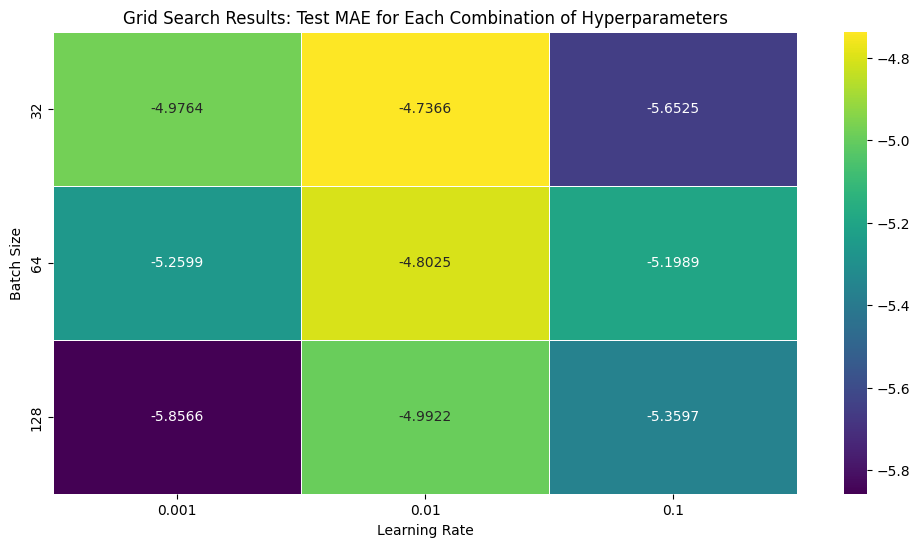

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('parkinsons.csv') 

X = data.drop(columns=['target']) 
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

mlp = MLPRegressor(hidden_layer_sizes=(10, 10), random_state=0)

param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # L2 penalty
    'learning_rate_init': [0.001, 0.01, 0.1],  # Initial learning rate
    'batch_size': [32, 64, 128]  # Batch size
}

scorer = make_scorer(mean_absolute_error, greater_is_better=False)

grid_search = GridSearchCV(mlp, param_grid, scoring=scorer, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Since we're minimizing MAE, we negate the negative score

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation MAE:", best_score)

y_pred = grid_search.best_estimator_.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print("Test MAE with Best Hyperparameters:", test_mae)

results = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(12, 6))
sns.heatmap(results.pivot_table(values='mean_test_score', index='param_batch_size', columns='param_learning_rate_init'),
            annot=True, fmt='.4f', cmap='viridis', linewidths=0.5)
plt.title('Grid Search Results: Test MAE for Each Combination of Hyperparameters')
plt.xlabel('Learning Rate')
plt.ylabel('Batch Size')
plt.show()


Com base nos resultados da Grid Search realizada, a melhor combinação de hiperparâmetros é:
    alpha = 0.01 (L2_penalty)
    learning_rate_init = 0.1
    batch_size = 32

Isto deve-se ao facto de ser a combinação que obteve um valor de MAE mais baixo.

TRADE-OFFS

Para o L2-penalty, enquanto valores mais baixos podem causar overfitting devido à maior liberdade que o modelo tem para ajustar os dados, valores mais altos ajudam a prevenir overfitting regulando mais fortemente o modelo. Deve então ser encontrado um equilibrio entre complexidade e risco de overfitting.

Para o learning rate, à medida que se aumenta o valor aumenta-se também a velocidade 
de convergência e, consequentemente, de treino. No entanto, se muito elevado, este aumento de velocidade pode causar instabilidade e perda da solução ideal, devendo-se assim encontrar um equilíbrio entre velocidade e precisão/estabilidade.

Quanto ao batch size, enquanto para valores mais baixo são realizadas mais atualizações (que por sua vez são mais ruidosas, o que pode melhorar a generalização), levando a uma desaceleração do treino devido às atualizações mais frenquentes, para valores maiores o modelo faz atualizações mais estáveis, resultando num treino mais suave mas também mais lento.